In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
heart_data=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [ ]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Data details

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Data Cleaning

In [ ]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

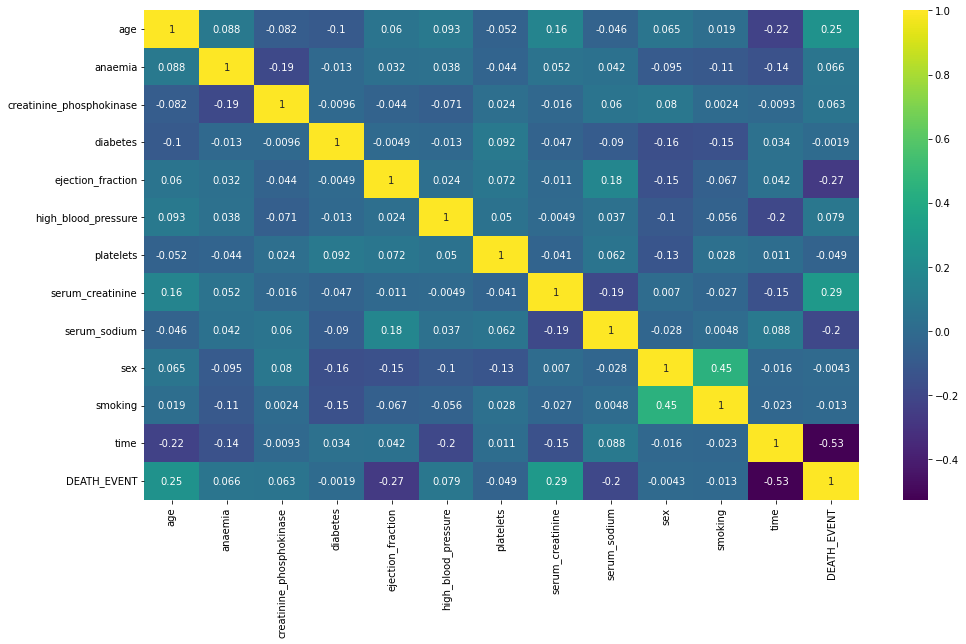

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(heart_data.corr(), annot = True, cmap="viridis")
plt.show()

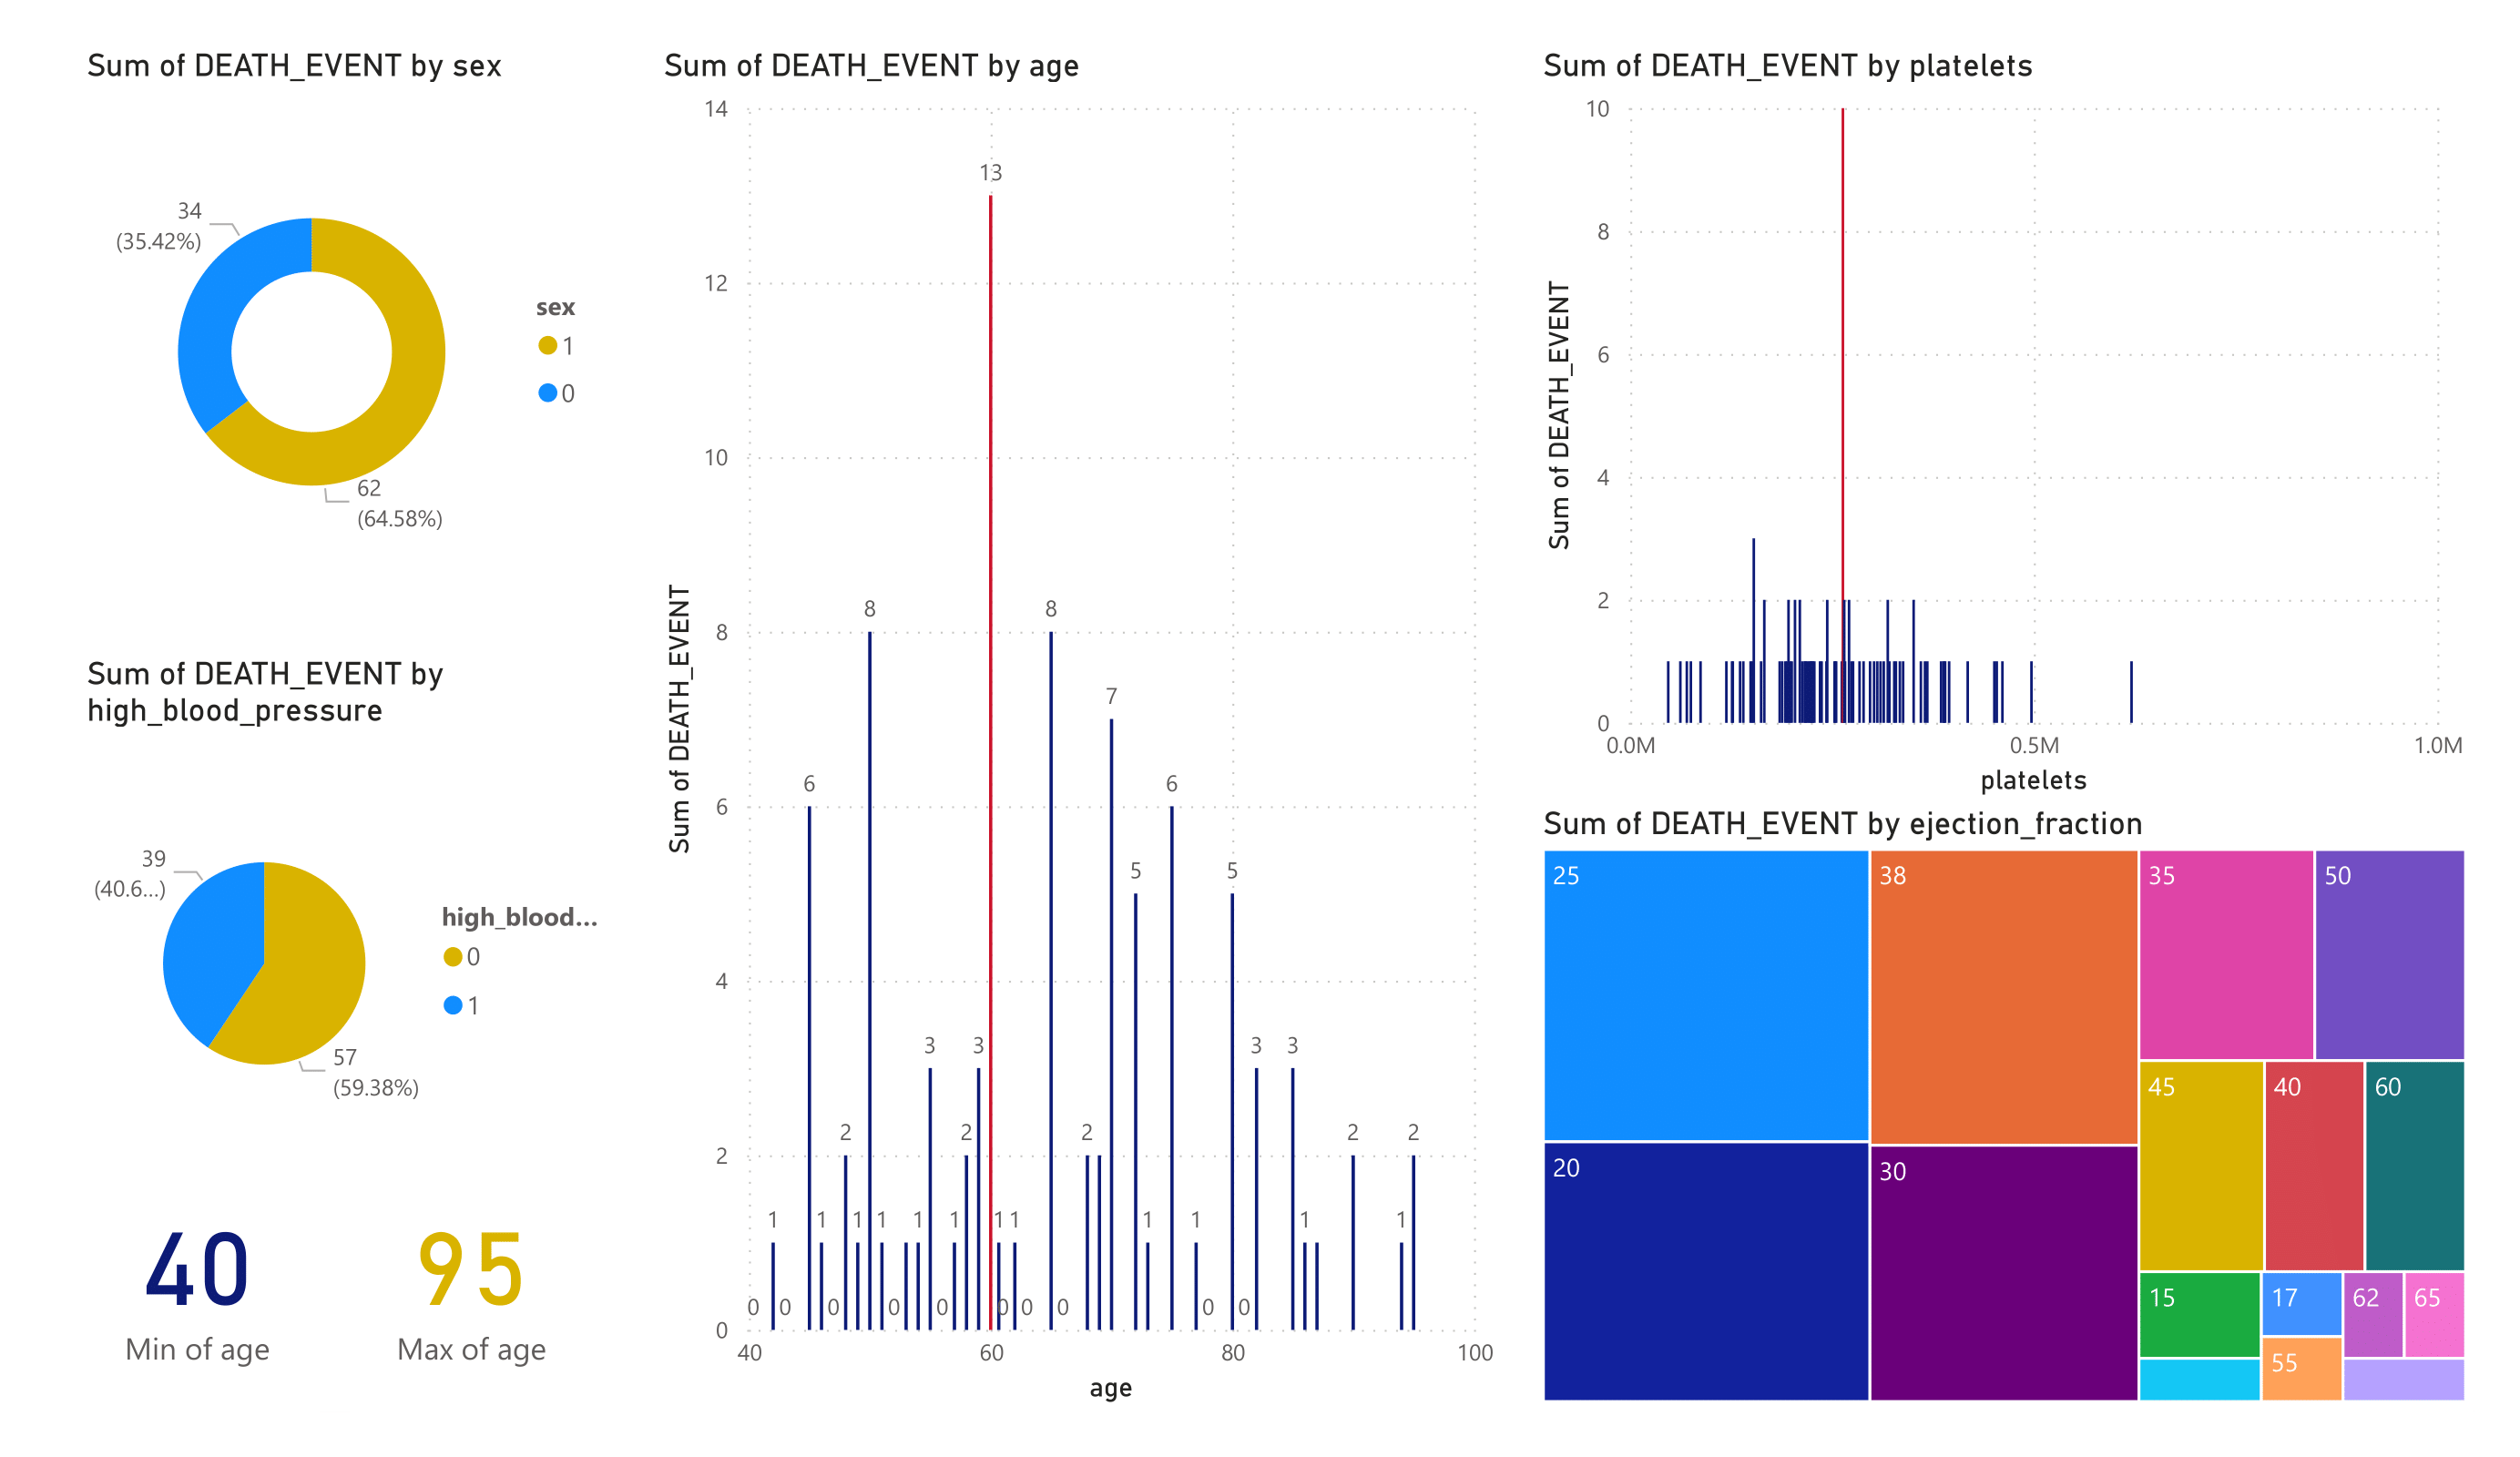

In [ ]:
df_platelet=heart_data[heart_data['platelets']==263358.03]
df_platelet

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
8,65.0,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
24,75.0,0,582,1,30,1,263358.03,1.83,134,0,0,23,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
40,70.0,0,582,0,20,1,263358.03,1.83,134,1,1,31,1
52,60.0,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
81,67.0,0,582,0,50,0,263358.03,1.18,137,1,1,76,0
92,42.0,0,582,0,60,0,263358.03,1.18,137,0,0,82,0
101,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87,0


In [ ]:
df_platelet.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,25.000000,25.000000,25.00000,25.000000,25.00000,25.000000,25.00,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,62.040000,0.120000,1141.36000,0.360000,41.40000,0.320000,263358.03,1.608000,135.560000,0.640000,0.360000,124.640000,0.4
std,14.034125,0.331662,1590.62697,0.489898,14.62589,0.476095,0.00,1.124785,5.590766,0.489898,0.489898,82.481756,0.5
min,42.000000,0.000000,157.00000,0.000000,20.00000,0.000000,263358.03,1.000000,113.000000,0.000000,0.000000,6.000000,0.0
25%,51.000000,0.000000,582.00000,0.000000,35.00000,0.000000,263358.03,1.180000,134.000000,0.000000,0.000000,63.000000,0.0
50%,60.000000,0.000000,582.00000,0.000000,38.00000,0.000000,263358.03,1.180000,137.000000,1.000000,0.000000,107.000000,0.0
75%,73.000000,0.000000,892.00000,1.000000,45.00000,1.000000,263358.03,1.830000,137.000000,1.000000,1.000000,198.000000,1.0
max,94.000000,1.000000,7861.00000,1.000000,80.00000,1.000000,263358.03,6.800000,146.000000,1.000000,1.000000,256.000000,1.0


In [ ]:
df_eject_frac=heart_data[heart_data['ejection_fraction']==25]
df_eject_frac

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
11,62.0,0,231,0,25,1,253000.0,0.90,140,1,1,10,1
18,70.0,1,125,0,25,1,237000.0,1.00,140,0,0,15,1
20,65.0,1,52,0,25,1,276000.0,1.30,137,0,0,16,0
46,51.0,0,1380,0,25,1,271000.0,0.90,130,1,0,38,1
50,68.0,1,577,0,25,1,166000.0,1.00,138,1,0,43,1
60,45.0,0,7702,1,25,1,390000.0,1.00,139,1,0,60,1
67,72.0,1,110,0,25,0,274000.0,1.00,140,1,1,65,1
68,70.0,0,161,0,25,0,244000.0,1.20,142,0,0,66,1
69,65.0,0,113,1,25,0,497000.0,1.83,135,1,0,67,1
82,60.0,1,76,1,25,0,196000.0,2.50,132,0,0,77,1


In [ ]:
df_eject_frac.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,61.194444,0.527778,611.972222,0.388889,25.0,0.333333,263166.666667,1.478611,136.777778,0.750000,0.277778,120.500000,0.500000
std,7.992209,0.506309,1306.688869,0.494413,0.0,0.478091,81712.562419,0.826739,3.993646,0.439155,0.454257,68.131176,0.507093
min,45.000000,0.000000,52.000000,0.000000,25.0,0.000000,130000.000000,0.800000,129.000000,0.000000,0.000000,10.000000,0.000000
25%,58.000000,0.000000,122.500000,0.000000,25.0,0.000000,211500.000000,1.000000,134.750000,0.750000,0.000000,74.500000,0.000000
50%,60.000000,1.000000,231.000000,0.000000,25.0,0.000000,252500.000000,1.200000,136.500000,1.000000,0.000000,99.000000,0.500000
75%,65.000000,1.000000,578.250000,1.000000,25.0,1.000000,299000.000000,1.700000,140.000000,1.000000,1.000000,190.500000,1.000000
max,80.000000,1.000000,7702.000000,1.000000,25.0,1.000000,504000.000000,5.000000,144.000000,1.000000,1.000000,235.000000,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
X = heart_data.drop(['DEATH_EVENT'], axis=1)
y = heart_data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
def metrics_summary(model_name,model,predictions):
  accuracy=metrics.accuracy_score(y_test,predictions)
  print(f"Accuracy score of {model_name} is {accuracy}")
  prob=model.predict_proba(X_test)
  pred=prob[:,1]
  fpr,tpr,threshold=metrics.roc_curve(y_test,pred)
  roc_auc=metrics.roc_auc_score(y_test,predictions)
  print('ROC_AUC score for ' +model_name+' is:',roc_auc)


ML Models

# Logistic Regression

In [ ]:
lmodel=LogisticRegression()
lmodel.fit(X_train,y_train)
lpredictions=lmodel.predict(X_test)

In [ ]:
metrics_summary("Logistic Regression",lmodel,lpredictions)

Accuracy score of Logistic Regression is 0.8
ROC_AUC score for Logistic Regression is: 0.7714285714285715


Hyperparameter tuning  using GridSearch CV

In [ ]:
log_params=[{"solver":["liblinear","lbfgs"],
             "C":[10,1.0,0.1],
             "max_iter":[200,300,500]}]

In [ ]:
lgclf=GridSearchCV(lmodel,log_params,scoring='accuracy')
lgclf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [10, 1.0, 0.1], 'max_iter': [200, 300, 500],
                          'solver': ['liblinear', 'lbfgs']}],
             scoring='accuracy')

In [ ]:
print(lgclf.best_params_)
print(lgclf.best_score_)

{'C': 10, 'max_iter': 200, 'solver': 'liblinear'}
0.8660460992907801


# DecisionTree

In [ ]:
dtmodel=DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtpredictions=dtmodel.predict(X_test)

In [ ]:
metrics_summary("Decision Tree",dtmodel,dtpredictions)

Accuracy score of Decision Tree is 0.6833333333333333
ROC_AUC score for Decision Tree is: 0.6485714285714287


hyperparameter tuning

In [ ]:
decision_params=[{"criterion":["gini","entropy"],
             "max_depth":range(5,10),
             "min_samples_split":range(2,10)}]

In [ ]:
dtclf=GridSearchCV(dtmodel,decision_params,scoring='accuracy')
dtclf.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(5, 10),
                          'min_samples_split': range(2, 10)}],
             scoring='accuracy')

In [ ]:
print(dtclf.best_params_)
print(dtclf.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 6}
0.836968085106383


# Random Forest

In [ ]:
rfmodel=RandomForestClassifier()
rfmodel.fit(X_train,y_train)
rfpredictions=rfmodel.predict(X_test)

In [ ]:
metrics_summary("Random Forest",rfmodel,rfpredictions)

Accuracy score of Random Forest is 0.7333333333333333
ROC_AUC score for Random Forest is: 0.6914285714285714


Hyper parameter tuning

In [ ]:
forest_params=[{'max_depth':list(range(10,15)),'max_features':list(range(4,12))}]
clf=GridSearchCV(rfmodel,forest_params,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [4, 5, 6, 7, 8, 9, 10, 11]}],
             scoring='accuracy')

In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 14, 'max_features': 4}
0.8913120567375886


# XGBoost

In [ ]:
xgbmodel=XGBClassifier()
xgbmodel.fit(X_train,y_train)
xgbpredictions=xgbmodel.predict(X_test)

In [ ]:
metrics_summary("XGBoost",xgbmodel,xgbpredictions)

Accuracy score of XGBoost is 0.7166666666666667
ROC_AUC score for XGBoost is: 0.6885714285714286


Hyper parameter tuning

In [ ]:
xgbparams={'max_depth':range(5,15),
           'n_estimators':range(60,220,40),
           'learning_rate':[0.1,0.01,0.05]}

In [ ]:
xgbclf=GridSearchCV(xgbmodel,xgbparams,scoring='accuracy')
xgbclf.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(5, 15),
                         'n_estimators': range(60, 220, 40)},
             scoring='accuracy')

In [ ]:
print(xgbclf.best_params_)
print(xgbclf.best_score_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140}
0.8538120567375888


In [ ]:
heart_data_copy=heart_data.copy()
for column in heart_data_copy.columns:
  if column!='DEATH_EVENT':
    heart_data_copy[column]=(heart_data_copy[column]-heart_data_copy[column].min())/(heart_data_copy[column].max()-heart_data_copy[column].min())
heart_data_copy

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619,0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178,0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089,0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206,0


In [ ]:
X = heart_data_copy.drop(['DEATH_EVENT'], axis=1)
y = heart_data_copy['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# logistic Regression after Normalization

In [ ]:
lmodel=LogisticRegression()
lmodel.fit(X_train,y_train)
lpredictions=lmodel.predict(X_test)

In [ ]:
metrics_summary("Logistic Regression",lmodel,lpredictions)

Accuracy score of Logistic Regression is 0.7166666666666667
ROC_AUC score for Logistic Regression is: 0.6657142857142856


Hyper parameter tuning

In [ ]:
log_params=[{"solver":["liblinear","lbfgs"],
             "C":[10,1.0,0.1],
             "max_iter":[200,300,500]}]

In [ ]:
lgclf=GridSearchCV(lmodel,log_params,scoring='accuracy')
lgclf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [10, 1.0, 0.1], 'max_iter': [200, 300, 500],
                          'solver': ['liblinear', 'lbfgs']}],
             scoring='accuracy')

In [ ]:
print(lgclf.best_params_)
print(lgclf.best_score_)

{'C': 1.0, 'max_iter': 200, 'solver': 'lbfgs'}
0.8323581560283688


# Deciosion Tree after normalizing

In [ ]:
dtmodel=DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtpredictions=dtmodel.predict(X_test)

In [ ]:
metrics_summary("Decision Tree",dtmodel,dtpredictions)

Accuracy score of Decision Tree is 0.6833333333333333
ROC_AUC score for Decision Tree is: 0.6542857142857142


Hyper parameter tuning

In [ ]:
decision_params=[{"criterion":["gini","entropy"],
             "max_depth":range(5,10),
             "min_samples_split":range(2,10)}]

In [ ]:
dtclf=GridSearchCV(dtmodel,decision_params,scoring='accuracy')
dtclf.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(5, 10),
                          'min_samples_split': range(2, 10)}],
             scoring='accuracy')

In [ ]:
print(dtclf.best_params_)
print(dtclf.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
0.8411347517730496


# Random forest after normalization

In [ ]:
rfmodel=RandomForestClassifier()
rfmodel.fit(X_train,y_train)
rfpredictions=rfmodel.predict(X_test)

In [ ]:
metrics_summary("Random Forest",rfmodel,rfpredictions)

Accuracy score of Random Forest is 0.7
ROC_AUC score for Random Forest is: 0.6685714285714286


Hyper parrameter tuning

In [ ]:
forest_params=[{'max_depth':list(range(10,15)),'max_features':list(range(4,12))}]
clf=GridSearchCV(rfmodel,forest_params,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [4, 5, 6, 7, 8, 9, 10, 11]}],
             scoring='accuracy')

In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 14, 'max_features': 4}
0.8913120567375886


# XGBoost after normalizing

In [ ]:
xgbmodel=XGBClassifier()
xgbmodel.fit(X_train,y_train)
xgbpredictions=xgbmodel.predict(X_test)

In [ ]:
metrics_summary("XGBoost",xgbmodel,xgbpredictions)

Accuracy score of XGBoost is 0.7166666666666667
ROC_AUC score for XGBoost is: 0.6885714285714286


Hyper parameter tuning

In [ ]:
xgbparams={'max_depth':range(5,15),
           'n_estimators':range(60,220,40),
           'learning_rate':[0.1,0.01,0.05]}

In [ ]:
xgbclf=GridSearchCV(xgbmodel,xgbparams,scoring='accuracy')
xgbclf.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(5, 15),
                         'n_estimators': range(60, 220, 40)},
             scoring='accuracy')

In [ ]:
print(xgbclf.best_params_)
print(xgbclf.best_score_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140}
0.8538120567375888


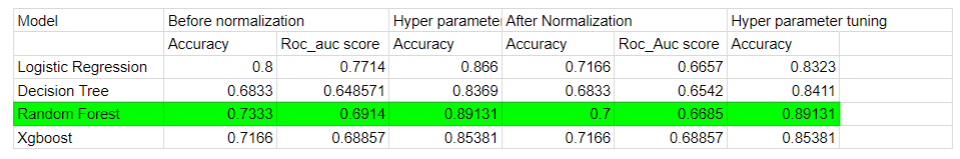

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 6.8 MB/s 
     |████████████████████████████████| 133 kB 73.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=8cca67c4ec1f2e7f9f8b3fd5b13fe1b09ec453d9e90cd5af194935b81f849d5e
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

Logistic regression

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
eli5.show_weights(lmodel, feature_names=X.columns.tolist())

Weight?,Feature
+1.910,serum_creatinine
+1.637,age
+1.413,<BIAS>
+0.315,creatinine_phosphokinase
+0.128,diabetes
-0.001,smoking
-0.026,anaemia
-0.073,high_blood_pressure
-0.372,platelets
-0.416,sex


Negative label

In [ ]:
eli5.show_prediction(lmodel,X_test.iloc[1],feature_names=X.columns.tolist(),show_feature_values=True)

In [ ]:
eli5.show_prediction(lmodel,X_test.iloc[8],feature_names=X.columns.tolist(),show_feature_values=True)

In [ ]:
eli5.show_weights(dtmodel, feature_names=X.columns.tolist())

Weight,Feature
0.4970,time
0.1480,serum_creatinine
0.0947,serum_sodium
0.0662,platelets
0.0489,ejection_fraction
0.0467,creatinine_phosphokinase
0.0368,age
0.0291,sex
0.0134,high_blood_pressure
0.0134,anaemia


In [ ]:
eli5.show_weights(xgbmodel, feature_names=X.columns.tolist())

Weight,Feature
0.3139,time
0.1824,serum_creatinine
0.0721,ejection_fraction
0.0719,age
0.0661,serum_sodium
0.0647,creatinine_phosphokinase
0.0518,platelets
0.0488,sex
0.0486,smoking
0.0332,high_blood_pressure


In [ ]:
eli5.show_weights(rfmodel, feature_names=X.columns.tolist())

Weight,Feature
0.3571 ± 0.2584,time
0.1626 ± 0.1499,serum_creatinine
0.1073 ± 0.1405,ejection_fraction
0.0948 ± 0.1212,age
0.0779 ± 0.0913,platelets
0.0779 ± 0.0966,creatinine_phosphokinase
0.0613 ± 0.0843,serum_sodium
0.0160 ± 0.0340,sex
0.0129 ± 0.0304,smoking
0.0128 ± 0.0309,anaemia


In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 7.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=03a357347455743a5d47d0187dae2edb72675ecfe34a288bbf4db035ae4c6469
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer=lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names=X_train.columns.tolist(),
                                                 class_names=['0','1'],verbose=True,mode='classification')

Lime for random forest

In [ ]:
i=1
exp=explainer.explain_instance(X_test.iloc[i],rfmodel.predict_proba,num_features=12)
exp.show_in_notebook(show_table=True)

Intercept 0.46043602036410225
Prediction_local [0.05157806]
Right: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Shap

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 9.6 MB/s 


In [ ]:
import shap

In [ ]:
explainer=shap.TreeExplainer(xgbmodel)
shap_values=explainer.shap_values(X_train)
shap_values2=explainer.shap_values(X_test)
shap_values3=explainer.shap_values(X)
print(explainer.expected_value)

-1.12739


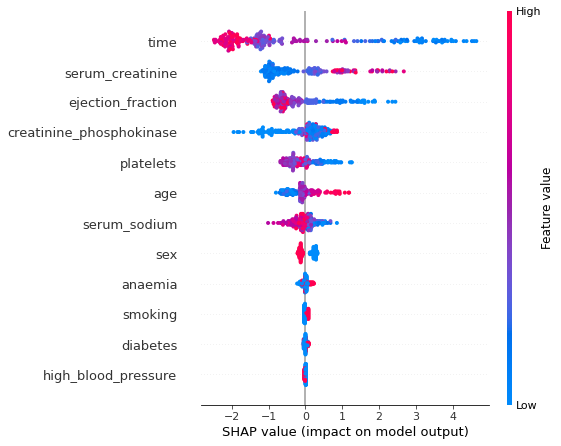

In [ ]:
shap.summary_plot(shap_values,X_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values2[1,:],X_train.iloc[1,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], X.iloc[1,:])

# predictions

In [ ]:
p_ind=8
n_ind=1
print(y_test.iloc[[p_ind]])
print(y_test.iloc[[n_ind]])

5    1
Name: DEATH_EVENT, dtype: int64
265    0
Name: DEATH_EVENT, dtype: int64


In [ ]:
print(f"Logistic regression:{lmodel.predict_proba(X_test.iloc[[p_ind]])}")
print(f"Decision Tree:{dtmodel.predict_proba(X_test.iloc[[p_ind]])}")
print(f"xgboost:{xgbmodel.predict_proba(X_test.iloc[[p_ind]])}")
print(f"random forest:{lmodel.predict_proba(X_test.iloc[[p_ind]])}")

Logistic regression:[[0.21744625 0.78255375]]
Decision Tree:[[0. 1.]]
xgboost:[[0.04619217 0.95380783]]
random forest:[[0.21744625 0.78255375]]


In [ ]:
print(f"Logistic regression:{lmodel.predict_proba(X_test.iloc[[n_ind]])}")
print(f"Decision Tree:{dtmodel.predict_proba(X_test.iloc[[n_ind]])}")
print(f"xgboost:{xgbmodel.predict_proba(X_test.iloc[[n_ind]])}")
print(f"random forest:{lmodel.predict_proba(X_test.iloc[[n_ind]])}")

Logistic regression:[[0.96141602 0.03858398]]
Decision Tree:[[1. 0.]]
xgboost:[[0.9958479  0.00415215]]
random forest:[[0.96141602 0.03858398]]
